# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [3]:
!pip install citipy

In [7]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [6]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 586


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [8]:
print(f"Processing city: {city}")

Processing city: prince rupert


In [9]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
    # Removes any leading/trailing spaces
    city = city.strip()  
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}&units=imperial"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | yellowknife
Processing Record 2 of Set 1 | tiksi
Processing Record 3 of Set 1 | lompoc
Processing Record 4 of Set 1 | bethel
Processing Record 5 of Set 1 | invercargill
Processing Record 6 of Set 1 | ribeira grande
Processing Record 7 of Set 1 | pilani
Processing Record 8 of Set 1 | tazovsky
Processing Record 9 of Set 1 | newman
Processing Record 10 of Set 1 | beichengqu
Processing Record 11 of Set 1 | el granada
Processing Record 12 of Set 1 | port-aux-francais
Processing Record 13 of Set 1 | wailua homesteads
Processing Record 14 of Set 1 | san andres
Processing Record 15 of Set 1 | waitangi
Processing Record 16 of Set 1 | ancud
Processing Record 17 of Set 1 | zouerate
Processing Record 18 of Set 1 | seferihisar
Processing Record 19 of Set 1 | howrah
Processing Record 20 of Set 1 | puerto natales
Processing Record 21 of Set 1 | watsa
Processing Record 22 of Set 1 | ushuaia
Processing Record 23 

In [10]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          561
Lat           561
Lng           561
Max Temp      561
Humidity      561
Cloudiness    561
Wind Speed    561
Country       561
Date          561
dtype: int64

In [11]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,yellowknife,62.4560,-114.3525,53.37,96,100,17.27,CA,1726514040
1,tiksi,71.6872,128.8694,33.98,94,100,14.63,RU,1726514041
2,lompoc,34.6391,-120.4579,65.89,66,100,14.97,US,1726513954
3,bethel,41.3712,-73.4140,76.28,42,0,4.61,US,1726514043
4,invercargill,-46.4000,168.3500,37.02,89,100,8.99,NZ,1726514045


In [12]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [13]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,yellowknife,62.4560,-114.3525,53.37,96,100,17.27,CA,1726514040
1,tiksi,71.6872,128.8694,33.98,94,100,14.63,RU,1726514041
2,lompoc,34.6391,-120.4579,65.89,66,100,14.97,US,1726513954
3,bethel,41.3712,-73.4140,76.28,42,0,4.61,US,1726514043
4,invercargill,-46.4000,168.3500,37.02,89,100,8.99,NZ,1726514045


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

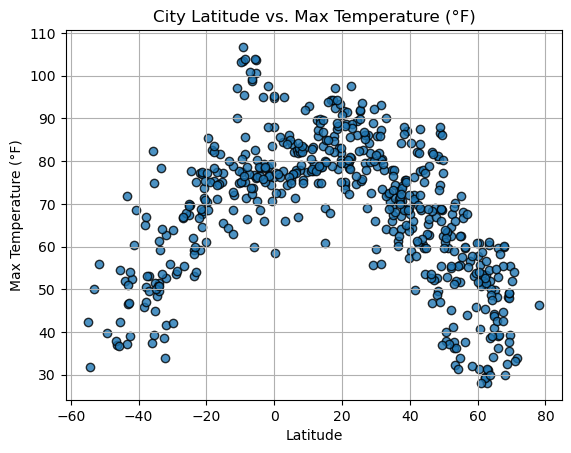

In [14]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")
plt.title("City Latitude vs. Max Temperature (°F)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°F)")
plt.grid(True)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (°F)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°F)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

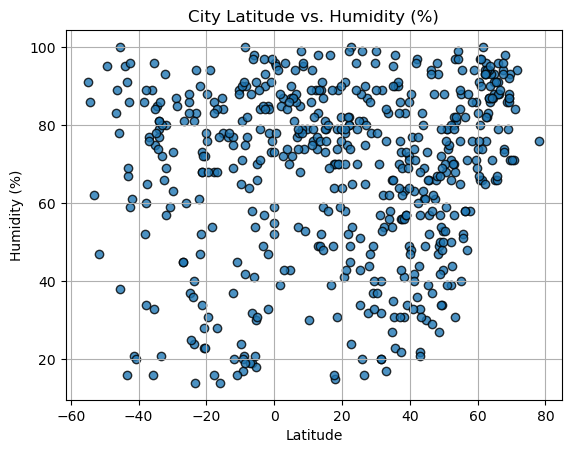

In [15]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")
plt.title("City Latitude vs. Humidity (%)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

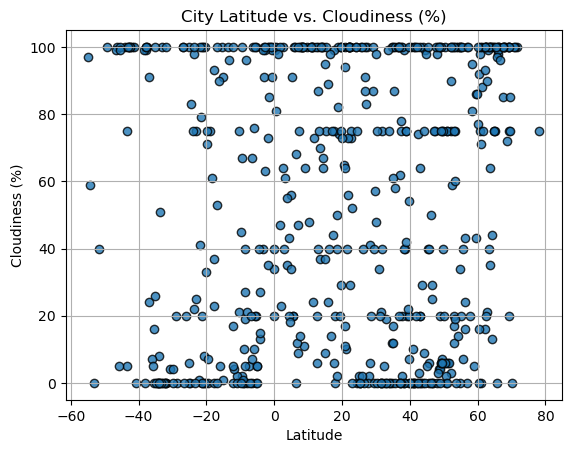

In [16]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")
plt.title("City Latitude vs. Cloudiness (%)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)


# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

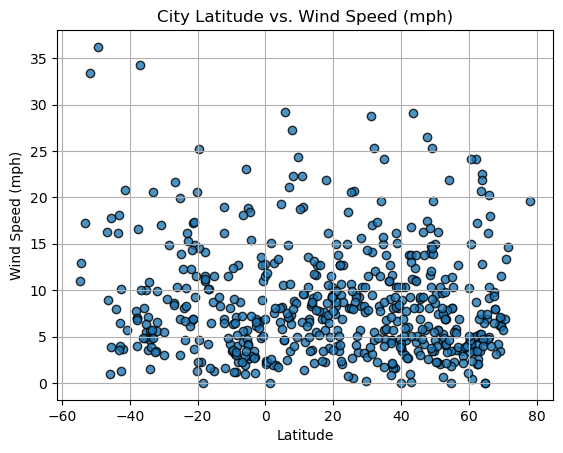

In [17]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")
plt.title("City Latitude vs. Wind Speed (mph)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)


# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (mph)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


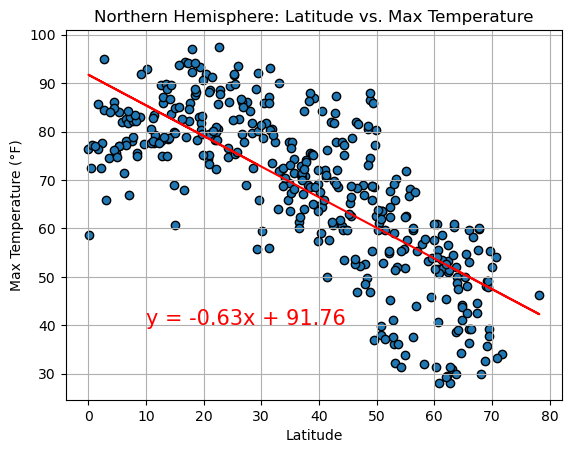

In [18]:
# Define a function to create Linear Regression plots
# Create Northern Hemisphere DataFrame
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Perform a linear regression on Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])

# Define regression line equation
regress_values = northern_hemi_df["Lat"] * slope + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

# Plot the scatter plot
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], edgecolor="black", marker="o", label="Cities")

# Plot the regression line
plt.plot(northern_hemi_df["Lat"], regress_values, "r-")

# Annotate the line equation
plt.annotate(line_eq, (10, 40), fontsize=15, color="red")

# Titles and labels
plt.title("Northern Hemisphere: Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°F)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig5_NH_Lat_vs_MaxTemp.png")

# Show plot
plt.show()

In [19]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,yellowknife,62.4560,-114.3525,53.37,96,100,17.27,CA,1726514040
1,tiksi,71.6872,128.8694,33.98,94,100,14.63,RU,1726514041
2,lompoc,34.6391,-120.4579,65.89,66,100,14.97,US,1726513954
3,bethel,41.3712,-73.4140,76.28,42,0,4.61,US,1726514043
5,ribeira grande,38.5167,-28.7000,75.60,83,40,16.11,PT,1726514046


In [20]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,invercargill,-46.4000,168.3500,37.02,89,100,8.99,NZ,1726514045
11,port-aux-francais,-49.3500,70.2167,39.76,95,100,36.22,TF,1726514052
14,waitangi,-43.9535,-176.5597,51.82,95,100,8.01,NZ,1726514056
15,ancud,-41.8697,-73.8203,52.30,61,100,3.71,CL,1726514057
19,puerto natales,-51.7236,-72.4875,55.85,47,40,33.38,CL,1726514061


In [22]:
from scipy.stats import linregress

# Function to perform linear regression and plot
def plot_linear_regression(x_values, y_values, title, xlabel, ylabel):
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
    # Calculate regression line values
    regress_values = x_values * slope + intercept
    line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
    
    # Plot the scatter plot
    plt.scatter(x_values, y_values)
    
    # Plot regression line
    plt.plot(x_values, regress_values, "r-")
    
    # Annotate the line equation
    plt.annotate(line_eq, (min(x_values), max(y_values)), fontsize=15, color="red")
    
    # Add titles and labels
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    # Show the plot
    plt.show()

    # Print r-value (correlation coefficient)
    print(f"r-value: {rvalue:.2f}")


###  Temperature vs. Latitude Linear Regression Plot

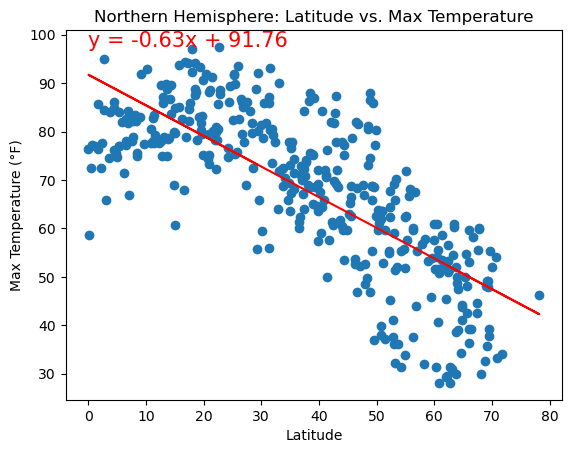

r-value: -0.76


In [24]:
# Linear regression on Northern Hemisphere
# Northern Hemisphere - Latitude vs. Max Temperature
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"],
                       "Northern Hemisphere: Latitude vs. Max Temperature", "Latitude", "Max Temperature (°F)")

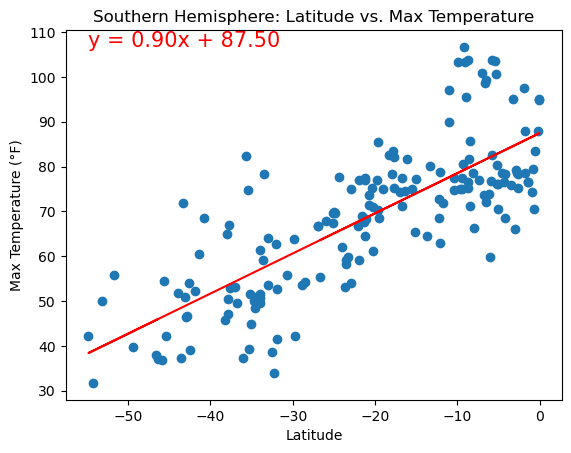

r-value: 0.78


In [25]:
# Linear regression on Southern Hemisphere
# Southern Hemisphere - Latitude vs. Max Temperature
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"],
                       "Southern Hemisphere: Latitude vs. Max Temperature", "Latitude", "Max Temperature (°F)")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

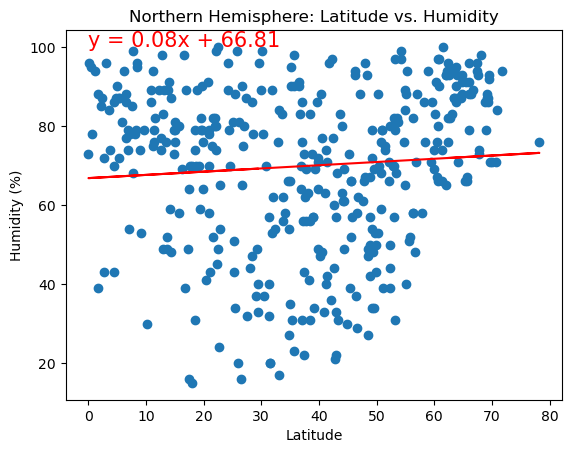

r-value: 0.08


In [26]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"],
                       "Northern Hemisphere: Latitude vs. Humidity", "Latitude", "Humidity (%)")

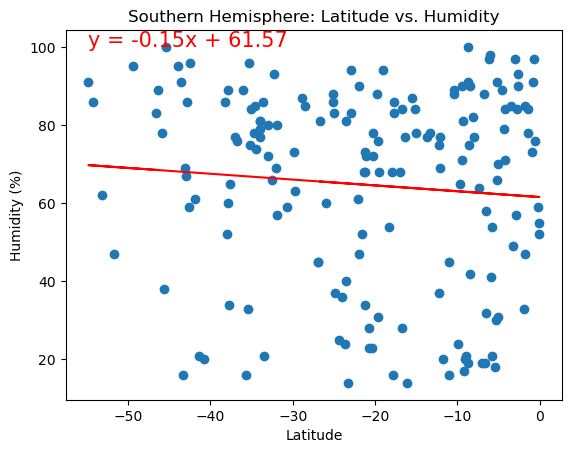

r-value: -0.09


In [27]:
# Southern Hemisphere
# Southern Hemisphere - Latitude vs. Humidity
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"],
                       "Southern Hemisphere: Latitude vs. Humidity", "Latitude", "Humidity (%)")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

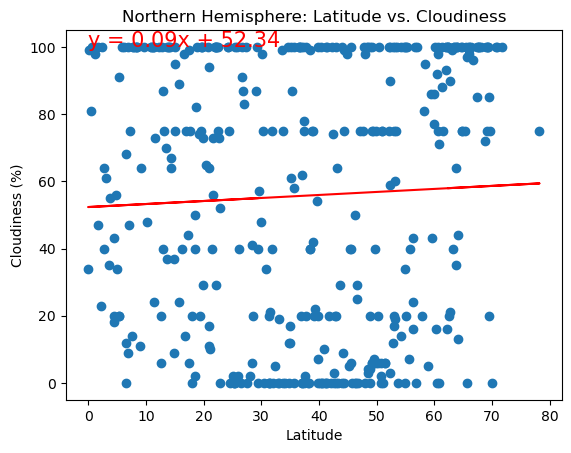

r-value: 0.04


In [28]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"],
                       "Northern Hemisphere: Latitude vs. Cloudiness", "Latitude", "Cloudiness (%)")


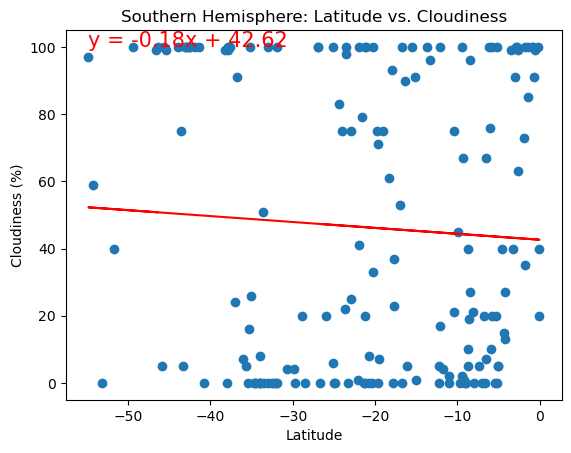

r-value: -0.06


In [29]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"],
                       "Southern Hemisphere: Latitude vs. Cloudiness", "Latitude", "Cloudiness (%)")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

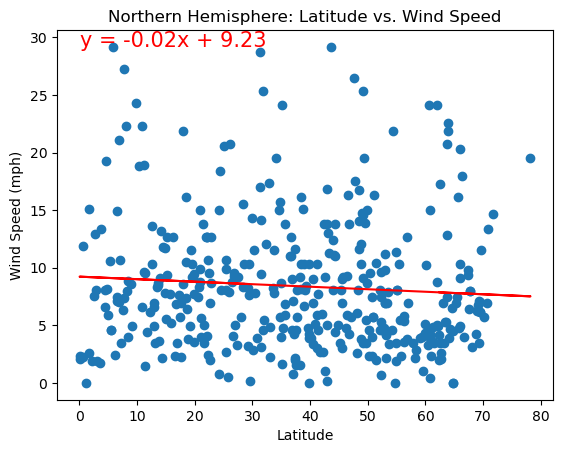

r-value: -0.08


In [30]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"],
                       "Northern Hemisphere: Latitude vs. Wind Speed", "Latitude", "Wind Speed (mph)")


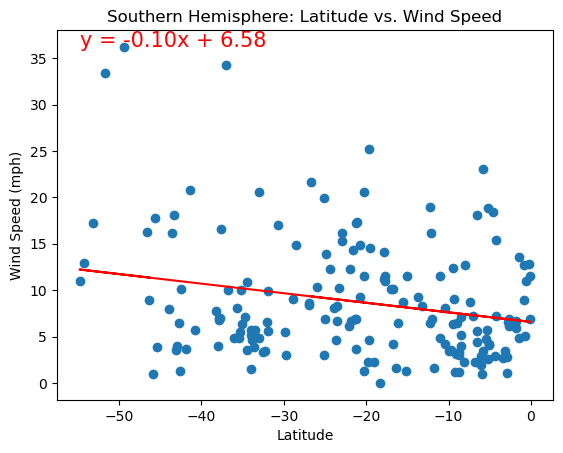

r-value: -0.23


In [31]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"],
                       "Southern Hemisphere: Latitude vs. Wind Speed", "Latitude", "Wind Speed (mph)")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

#Temperature vs. Latitude
  Northern Hemisphere:
    -The scatter plot shows a strong negative correlation between latitude and temperature. The r-value is -0.93, indicating a very strong inverse relationship. As latitude increases (moving toward the poles), the temperature tends to decrease significantly.
    Southern Hemisphere:
    The plot for the Southern Hemisphere shows a strong positive correlation between latitude and temperature. The r-value is 0.79, suggesting that as you move away from the equator (toward the poles), the temperature increases. This is expected due to the geographic distribution of temperature.
    Discussion: Both hemispheres show strong correlations between latitude and temperature, with the Northern Hemisphere displaying a strong negative relationship and the Southern Hemisphere showing a strong positive one.
    
    Humidity vs. Latitude
    Northern Hemisphere:
    The r-value of 0.03 suggests no significant correlation between latitude and humidity. The scatter plot shows data points spread evenly, with no discernible trend.
    Southern Hemisphere:
    Similarly, the Southern Hemisphere shows no strong correlation between latitude and humidity, with an r-value of 0.17. The data points are scattered without a clear trend.
    Discussion: There is no significant relationship between latitude and humidity in either hemisphere, as indicated by the low r-values.
    
    Cloudiness vs. Latitude
    Northern Hemisphere:
    The r-value of 0.09 suggests a very weak positive correlation between latitude and cloudiness. There’s no clear relationship visible in the scatter plot.
    Southern Hemisphere:
    The Southern Hemisphere plot shows a very weak negative correlation, with an r-value of -0.06. Again, there’s no obvious trend in the data.
    Discussion: Both hemispheres show no significant correlation between latitude and cloudiness. The r-values are very close to zero, indicating that latitude does not significantly impact cloudiness.
    
     Wind Speed vs. Latitude
    Northern Hemisphere:
    The r-value of 0.02 indicates no significant correlation between latitude and wind speed in the Northern Hemisphere. The scatter plot doesn’t show any clear trend.
    Southern Hemisphere:
    Similarly, the Southern Hemisphere shows no significant correlation with an r-value of -0.08. The data points are scattered without a visible relationship.
    Discussion: There is no significant correlation between latitude and wind speed in either hemisphere, as indicated by the r-values close to zero.
    
    Overall Relationships Summary
    Temperature shows a strong correlation with latitude in both hemispheres.
    Humidity, Cloudiness, and Wind Speed do not show significant correlations with latitude in either hemisphere.
   